In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Load dataset
names = ['Gender', 'Age', 'Cough', 'Fever', 'Active.Breathing.Shortness', 'Weight.Loss', 'Haemoptysis', 'TB.Medication.History', 'CAD4TB6', 'Xpert2Outcome_num']
dataset = pd.read_csv('DataWrangling/ML_CAD.csv', index_col=0, na_values=[' ']).fillna(0)

dataset.info()

dataset['Xpert2Outcome_num'] = dataset['Xpert2Outcome_num'].astype('str')
dataset.dtypes
# dataset['Xpert2Outcome_num'] = dataset['Xpert2Outcome_num'].replace({'0': 'Neg', '1': 'Pos'})
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Index: 23566 entries, F to M
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         23566 non-null  int64 
 1   Cough                       23566 non-null  object
 2   Fever                       23566 non-null  object
 3   Active.Breathing.Shortness  23566 non-null  object
 4   Weight.Loss                 23566 non-null  object
 5   Haemoptysis                 23566 non-null  object
 6   TB.Medication.History       23566 non-null  object
 7   CAD4TB6                     23566 non-null  int64 
 8   Xpert2Outcome_num           23566 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.8+ MB


,Age,Cough,Fever,Active.Breathing.Shortness,Weight.Loss,Haemoptysis,TB.Medication.History,CAD4TB6,Xpert2Outcome_num
Gender,,,,,,,,,
F,22,Yes,Yes,No,Yes,No,No,70,1
M,30,Yes,Yes,No,No,No,No,51,0
M,29,Yes,No,Yes,No,No,No,3,0
F,31,Yes,Yes,Yes,No,No,No,30,0
F,32,No,No,No,Yes,No,No,59,0


### Need to convert "Yes" to 1

In [3]:
cols = ['Cough', 'Fever', 'Active.Breathing.Shortness', 'Weight.Loss', 'Haemoptysis', 'TB.Medication.History']
dataset[cols] = dataset[cols].replace({'Yes':1, 'No': 0})

In [4]:
array = dataset.values

array[1, 0:2]


array([30, 1], dtype=object)

# Split and set out the model

We set the random seed via the random_state argument to a fixed number to ensure that each algorithm is evaluated on the same splits of the training dataset. The specific random seed does not matter. 

We are using the metric of ‘accuracy‘ to evaluate models.

This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will be using the scoring variable when we run build and evaluate each model next.

In [5]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:8] # take the first 4 columns as x to predict 'class'
y = array[:,8] # separate 'class' variable as the predictor

X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)
# We set the random seed via the random_state argument to a fixed number to ensure that each algorithm is evaluated on the same splits of the training dataset.


# Build models
Let’s test 6 different algorithms:

Logistic Regression (LR)
Linear Discriminant Analysis (LDA)
K-Nearest Neighbors (KNN).
Classification and Regression Trees (CART).
Gaussian Naive Bayes (NB).
Support Vector Machines (SVM).

This is a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

In [6]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Model selection

We now have 6 models and accuracy estimations for each. We need to compare the models to each other and select the most accurate.

In [7]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.860916 (0.003525)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.863357 (0.004274)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.841555 (0.004448)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.808720 (0.007953)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.828612 (0.009985)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.859750 (0.003285)


We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (via 10 fold-cross validation).

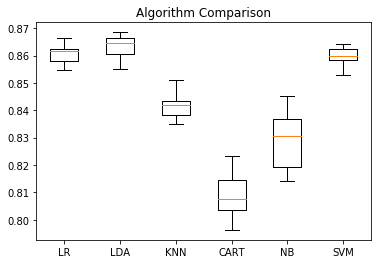

In [8]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

# # Find the error rate on the traininign set
# from sklearn.metrics import mean_absolute_error
# mse = mean_absolute_error(Y_train, model.predict(X_train))
# print("Training Set Mean Absolute Error: %.4f" % mse)


# Predict
Now we want to get an idea of the accuracy of the model on our validation set.

This will give us an independent final check on the accuracy of the best model. It is valuable to keep a validation set just in case you made a slip during training, such as overfitting to the training set or a data leak. Both of these issues will result in an overly optimistic result.

In [9]:
# model = SVC(gamma='auto')

model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

## Evaluate Predictions

The confusion matrix provides an indication of the three errors made.

The classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results (granted the validation dataset was small).

In [10]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

# Find the error rate on the test set
mse = mean_absolute_error(Y_validation, model.predict(X_validation))
print("Test Set Mean Absolute Error: %.4f" % mse)


0.8549002969876962
[[3803  137]
 [ 547  227]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3940
           1       0.62      0.29      0.40       774

    accuracy                           0.85      4714
   macro avg       0.75      0.63      0.66      4714
weighted avg       0.83      0.85      0.83      4714

Test Set Mean Absolute Error: 0.1451


# Dump / Save the selected model

In [11]:
from sklearn.externals import joblib

joblib.dump(model, 'Results/trained_ML_model.pkl')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Results/trained_ML_model.pkl']

# Feature Selection

In [12]:
import numpy as np
from sklearn.externals import joblib

# These are the feature labels from our data set
feature_labels = np.array(['Gender', 'Age', 'Cough', 'Fever', 'Active.Breathing.Shortness', 'Weight.Loss', 'Haemoptysis', 'TB.Medication.History', 'CAD4TB6'])

# Load the trained model created with train_model.py
model = joblib.load('Results/trained_ML_model.pkl')


# # Create a numpy array based on the model's feature importances
coefficients = model.coef_[0]*100

In [13]:
# Print each feature label, from most important to least important (reverse order)
# for index in coefficients:
#     print("{} - {}".format(feature_labels[index], coefficients[index]))
print(feature_labels)
print(coefficients)

['Gender' 'Age' 'Cough' 'Fever' 'Active.Breathing.Shortness' 'Weight.Loss'
 'Haemoptysis' 'TB.Medication.History' 'CAD4TB6']
[ -3.9043794   38.69376005  13.01073213 -20.37065603  18.71493686
 -13.53877253 -71.69535609   7.68367183]


# ROC 

In [14]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


testX = array[:,0:8] # take the first 4 columns as x to predict 'class'
testy = array[:,8] # separate 'class' variable as the predictor

# generate a original qXR score prediction (majority class)
ns_probs = array[:,7]

# predict probabilities
lr_probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

# summarize scores
print('Original qXR score ONLY: ROC AUC=%.5f' % (ns_auc))
print('Combined: ROC AUC=%.5f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Original qXR score ONLY')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Combined')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Original qXR score ONLY: ROC AUC=0.82264
Combined: ROC AUC=0.85462


ValueError: y_true takes value in {'0', '1'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [ ]:
print(array)